In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)


c:\Users\Kian\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_groupby = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_toppay = df_groupby.sort_values(by='median', ascending=False).head(10)
df_topcount = df_groupby.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
df_topcount

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


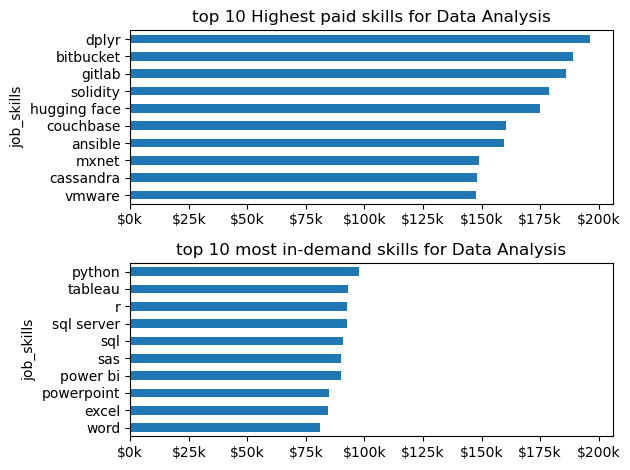

In [11]:
fig, ax = plt.subplots(2, 1)
df_toppay.plot(kind = 'barh', y = 'median', ax = ax[0], legend= False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[0].set_title("top 10 Highest paid skills for Data Analysis")
df_topcount.plot(kind = 'barh', y = 'median', ax = ax[1],legend= False)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
ax[1].set_title("top 10 most in-demand skills for Data Analysis")

ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()